## **Implement Support Vector Machines (SVM) to classify sentiments toward the COVID-19 pandemic (using Twitter data)**

In [82]:
#importing libraries
import pandas as pd
import numpy as np

In [83]:
#reading data
data=pd.read_csv("/content/COVIDSenti-A.csv")

In [84]:
#viewing data
data

,tweet,label
0,Coronavirus | Human Coronavirus Types | CDC ht...,neu
1,"@shehryar_taseer That‚Äôs üíØ true , \nCorona...",neu
2,"TLDR: Not SARS, possibly new coronavirus. Diff...",neg
3,Disease outbreak news from the WHO: Middle Eas...,neu
4,China - Media: WSJ says sources tell them myst...,neu
...,...,...
29995,CDC: Re-test confirms Westerdam cruise ship pa...,neu
29996,Two doctors die of coronavirus within 24 hours...,neu
29997,BEIJING - The lockdown of Guo Jing's neighbour...,neu
29998,#CoronavirusOutbreak in #Balochistan !!\n#CPEC...,neu


**Data Preprocessing**

In [87]:
#length of data   
len(data)

30000

In [85]:
#checking for null values
data.isnull().sum()

tweet    0
label    0
dtype: int64

In [110]:
#columns
data.columns

Index(['tweet', 'label'], dtype='object')

**Text Preprocessing**

#removing usernames , url , special characters and punctuations from tweets .
#changing all text into lowercase

In [88]:
from nltk.tokenize import WordPunctTokenizer
tok = WordPunctTokenizer()
from bs4 import BeautifulSoup
import re
pat1 = r'@[A-Za-z0-9]+'
pat2 = r'https?://[A-Za-z0-9./]+'
combined_pat = r'|'.join((pat1, pat2))
def tweet_cleaner(text):
    soup = BeautifulSoup(text, 'lxml')
    souped = soup.get_text()
    stripped = re.sub(combined_pat, '', souped)
    try:
        clean = stripped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        clean = stripped
    letters_only = re.sub("[^a-zA-Z]", " ", clean)
    lower_case = letters_only.lower()
    # During the letters_only process two lines above, it has created unnecessay white spaces,
    # I will tokenize and join together to remove unneccessary white spaces
    words = tok.tokenize(lower_case)
    return (" ".join(words)).strip()
testing = data['tweet']

test_result = []
for t in testing:
    test_result.append(tweet_cleaner(t))
test_result

['coronavirus human coronavirus types cdc',
 'taseer that s true corona virus swine flue bird flu in december when whole pk is busy in marriage',
 'tldr not sars possibly new coronavirus difficult to confirm because patients identified later in infection when',
 'disease outbreak news from the who middle east respiratory syndrome coronavirus mers cov the united arab emira',
 'china media wsj says sources tell them mystery pneumonia is a new coronavirus something that has been speculat',
 'the mystery new virus causing china pneumonia outbreak is possibly new coronavirus same family as sars and mers',
 'virologists weigh in on novel coronavirus in china s outbreak',
 'chinese authorities have made a preliminary determination of a novel or new coronavirus identified in a hospit',
 'why ccp keep on saying unknown cause of pneumonia the cause is obviously related to corona virus let s',
 'chinese report says mysterious illnesses may be from new coronavirus',
 'china identifies new strain o

In [90]:
#new dataframe is created using the cleaned data
cleaned_data = pd.DataFrame(test_result,columns=['tweet'])
cleaned_data['label'] = data.label
cleaned_data.head()

,tweet,label
0,coronavirus human coronavirus types cdc,neu
1,taseer that s true corona virus swine flue bir...,neu
2,tldr not sars possibly new coronavirus difficu...,neg
3,disease outbreak news from the who middle east...,neu
4,china media wsj says sources tell them mystery...,neu


In [112]:
#dropping duplicate tweets
cleaned_data.drop_duplicates(inplace=True)

In [114]:
#checking for null values
cleaned_data.isnull().sum()

tweet    0
label    0
dtype: int64

In [94]:
len(cleaned_data)

28460

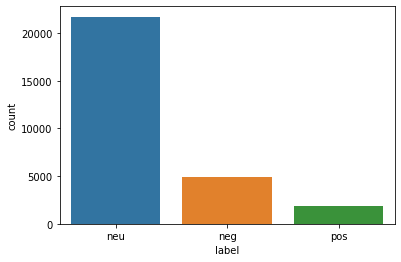

In [95]:
# count plot for label column
import seaborn as sns
sns.countplot(x=cleaned_data["label"])

In [96]:
cleaned_data["label"].value_counts()

neu    21720
neg     4879
pos     1861
Name: label, dtype: int64

dataset is imbalanced .

# **Train Test Split**

In [98]:
#splitting data frame into x and y
x=cleaned_data["tweet"]
y=cleaned_data["label"]

In [99]:
#splitting data into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=48)

In [100]:
x_train

5377     eurosurveillance real time tentative assessmen...
227      baja california toma medidas preventivas ante ...
29197    let s show support for the countries that need...
68              new cases of coronavirus reported in china
19744    unfortunately false masks don t do any good wi...
                               ...                        
24696    s pore doctor marathoner mok ying ren shares h...
11067    wuhancoronavirus confirmed wuhan coronavirus c...
9996     thanks to today s announcement of coronavirus ...
2713     dusting off my ole plague epidemic outfit coro...
16665    saw tamiflu trending and figured maybe they ha...
Name: tweet, Length: 22768, dtype: object

In [101]:
x_test

15573    the new coronavirus what we do and don t know ...
27444    travel news disembark from coronavirus quarant...
3159     i m actually so fucking mad at all the buried ...
29611    they sure are taking on a huge risk traveling ...
20873    sa still coronavirus free as people test negative
                               ...                        
18786    fourth person in uk tests positive for coronav...
25454    five in ten china s coronavirus data a little ...
20928              closeness in the age of coronavirus via
4374     s p o o k y what did the democrat politicians ...
7555     chinese new year firework celebrations still s...
Name: tweet, Length: 5692, dtype: object

#vector transformation usinf tf-idf

In [102]:
#tf-idf fro processing text data
from sklearn.feature_extraction.text import TfidfVectorizer
# Create feature vectors
vectorizer = TfidfVectorizer(min_df = 5,
                             max_df = 0.8,
                             sublinear_tf = True,
                             use_idf = True)
train_vectors = vectorizer.fit_transform(x_train)
test_vectors = vectorizer.transform(x_test)

Model Creation - SVM

In [103]:

#import support vector classifier 
#Support Vector Classifier

from sklearn.svm import SVC  
clf = SVC(kernel='linear') #linear kernel is used
clf.fit(train_vectors, y_train)

SVC(kernel='linear')

In [106]:
prediction_linear = clf.predict(test_vectors)

In [115]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_linear))

              precision    recall  f1-score   support

         neg       0.86      0.79      0.83       926
         neu       0.93      0.96      0.95      4403
         pos       0.81      0.58      0.68       363

    accuracy                           0.91      5692
   macro avg       0.87      0.78      0.82      5692
weighted avg       0.91      0.91      0.91      5692

